In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
PROJECT_PATH = '../'
import sys
sys.path.insert(0, PROJECT_PATH)

In [590]:
from PIML.box.boxWR import BoxWR

In [503]:
b = BoxWR()

#220 R=1000.00
(2204,) (220,)
sky_H (2204,)
snr2nl-SN [117.48897989212539, 123.16229361336093, 120.33565696776952, 98.8894386351706, 84.25218133385484, 71.75295764285396, 63.04060283820937, 39.552500618318795, 21.888181176472436, 8.51317591907856, 5.2393267192169395]
Top10 eigs [105.32   7.07   5.2    1.44   1.21   0.76   0.57   0.49   0.35   0.28]
Building RBF with gaussan kernel on data shape (2880,)
Building RBF with gaussan kernel on data shape (2880, 10)


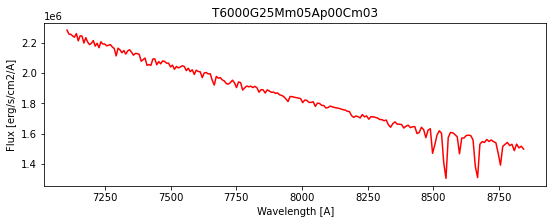

In [504]:
W="RedM"; R="R"; Res=5000;step=10;
b.init(W,R, Res,step, onPCA=1)

In [587]:
b.Obs.prepare_snr(b.flux[0])

snr2nl-SN [163.8094717472547, 147.37714107270125, 126.85440201414632, 96.6573465909392, 80.17295631149435, 63.81724470745839, 55.16477918834809, 29.443290838307245, 15.763734001284906, 6.506281124270013, 4.137646987690876]


In [588]:
b.Obs.prepare_snr(b.flux[-1])

snr2nl-SN [60.17007258943845, 59.541163463413874, 59.80886681006567, 56.76571332312418, 53.34300500384772, 50.745474636274835, 49.414042386257115, 38.31338876650493, 24.920678298976206, 10.252416760879308, 6.158922910163051]


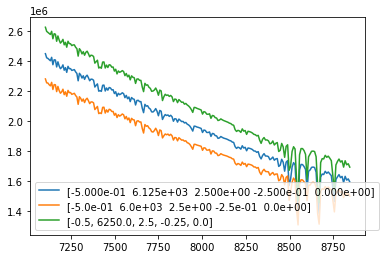

In [505]:
pmt2 = [-5.0e-01,  6.25e+03,  2.5e+00, -2.5e-01,  0.0e+00]
b.test_rbf(b.PhyMid, pmt2)

In [574]:
from PIML.nn.dnn.dnnWR import dnnWR

In [575]:
d = dnnWR(b)

In [576]:
d.estimate_snr(10)

66.21766946697807

In [577]:
NL=10
d.prepare_model(train_NL= NL, mtype="NoiseDNN") 

Layers: [10, 64, 32, 16, 3]


In [578]:
d.prepare_data(nTrain=100000, nTest=1000, test_NL=NL)

In [580]:
d.run(lr=0.01, dp=0.1, batch=128, nEpoch=100, verbose=0)

| EP 100 |loss: 0.0360 | mean_: 0.0360 | val_l: 0.0040 | val_m: 0.0040 | 


In [581]:
d.get_random_pmt = lambda x: b.get_random_pmt(x, nPara=5, method="halton")

100%|██████████| 10/10 [00:01<00:00,  6.89it/s]


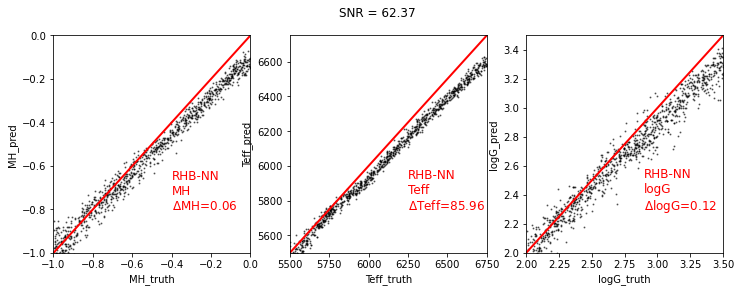

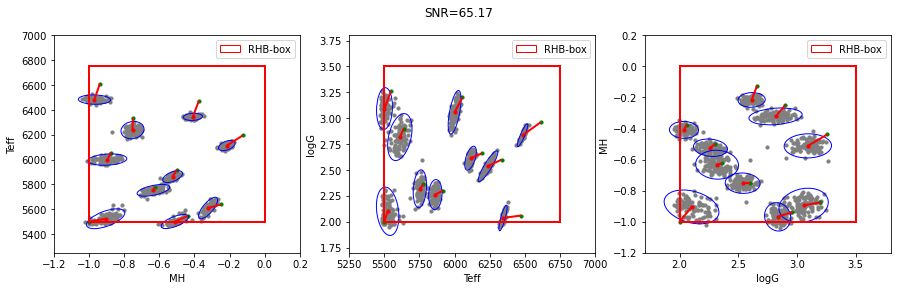

In [582]:
d.init_eval()

AttributeError: 'BoxWR' object has no attribute 'get_random_pmt_R'

100%|██████████| 10/10 [00:01<00:00,  7.27it/s]


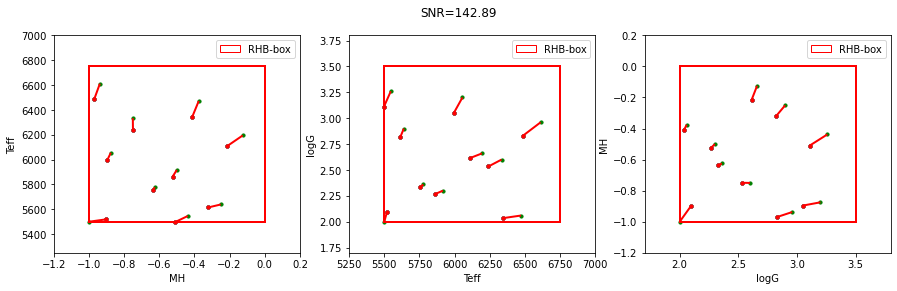

In [585]:
np.random.seed(926)
pmts = b.get_random_pmt(10)
d.eval_pmts_noise(pmts, 1, 100, 0.2)

In [319]:
train_pmts.shape

(100000, 5)

In [320]:
d.y_train

array([[0.        , 0.        , 0.        ],
       [0.5       , 0.33333333, 0.2       ],
       [0.25      , 0.66666667, 0.4       ],
       ...,
       [0.72414398, 0.61000751, 0.59975936],
       [0.47414398, 0.94334084, 0.79975936],
       [0.97414398, 0.09148899, 0.99975936]])

In [321]:
DG = DataGenerator(aks_train,std_train, train_pmts[:, d.odx], eigv=d.eigv, noise_level=1, batch_size=5, shuffle=False)

In [331]:
d.dnn.model.fit(DG, validation_data=DG)

6/6 [==============================] - 1s 92ms/step - loss: 12380998.0000 - mean_squared_error: 12380998.0000 - val_loss: 12371947.0000 - val_mean_squared_error: 12371947.0000


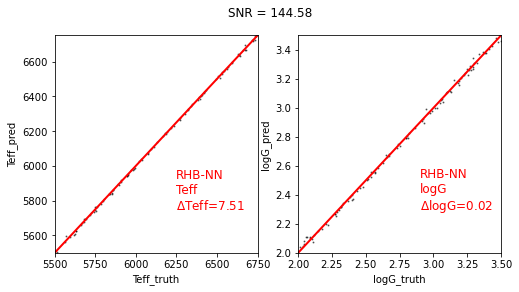

In [370]:
d.eval(snr = b.estimate_snr(NL))

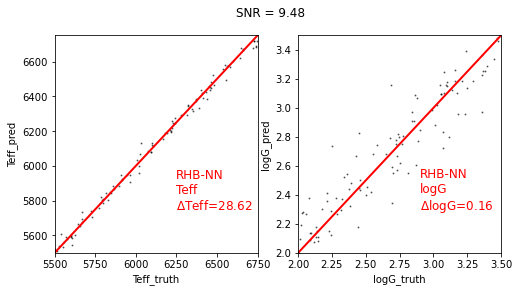

In [378]:
d.eval(snr = b.estimate_snr(NL))

In [ ]:
NL=100
bk_fns_10k, bks_10k = b.get_bk_fns(NL, pmts = train_pmts, out_bks=1)
bk_fns_1k, bks_1k = b.get_bk_fns(NL, pmts = test_pmts, out_bks=1)

In [382]:
bk_N_obs = b.get_bks_N_obs_from_pmt(noise_level=NL, pmt=b.PhyMid, N_obs=100)

In [391]:
b.PhyMid[d.odx]

array([6.0e+03, 2.5e+00])

In [395]:
d.eval_pmt_noise(bk_N_obs, b.PhyMid, 100)

(100, 2)
(100, 2)


TypeError: plot_box() missing 1 required positional argument: 'pdxs'

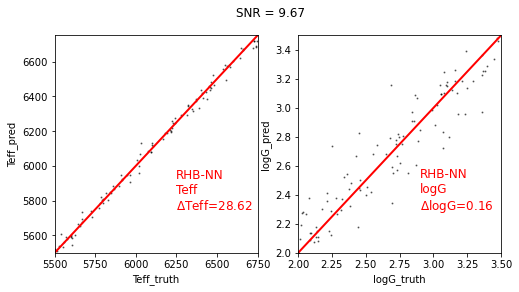

In [409]:
d.init_eval(NL, b.estimate_snr, b.get_bks_N_obs_from_pmt)

100%|██████████| 10/10 [00:01<00:00,  5.81it/s]


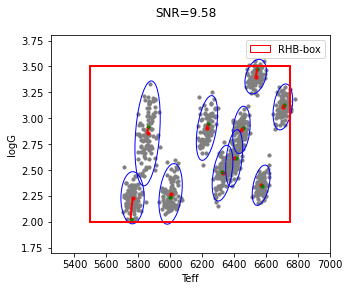

In [424]:
np.random.seed(926)
pmts = b.get_random_pmt(10)
d.eval_pmts_noise(pmts, NL, 100, 0.2)

100%|██████████| 10/10 [00:01<00:00,  5.05it/s]


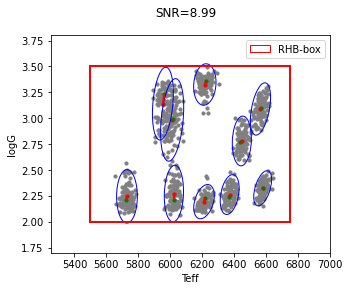

In [419]:
np.random.seed(1015)
pmts = b.get_random_pmt(10)
d.eval_pmts_noise(test_pmts[:10], NL, 100, 0.2)

100%|██████████| 10/10 [00:01<00:00,  7.95it/s]


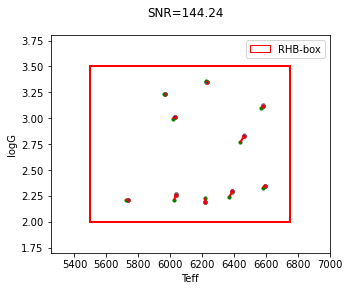

In [418]:
d.eval_pmts_noise(test_pmts[:10], 1, 10, 0.2)

In [407]:
preds

array([[5.93780401e+03, 2.49332368e+00],
       [6.03775650e+03, 2.57310952e+00],
       [5.98682369e+03, 2.56321526e+00],
       [6.05845223e+03, 2.55700625e+00],
       [5.96359144e+03, 2.67684199e+00],
       [5.95436975e+03, 2.30935119e+00],
       [6.02049469e+03, 2.90595248e+00],
       [5.99716830e+03, 2.22376805e+00],
       [6.03746711e+03, 2.37784439e+00],
       [5.99777813e+03, 2.34425741e+00]])

In [ ]:
# d.run(lr=0.01, dp=0.2, nEpoch=100, verbose=0)